In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import cooler
import cooltools
import bioframe
from cooltools.lib import plotting


In [14]:
# Replace path with path to your own cooler file
clr = cooler.Cooler('/commons/groups/gursoy_lab/wlounsberyscaife/PoreC_Tensors/output/cools/NlaIII_GM12878_chr20_tensor_balanced.cool')

In [15]:
hg38_genome = bioframe.load_fasta('/commons/groups/gursoy_lab/wlounsberyscaife/PoreC_Tensors/data/plot_annotation/hg38.fa')
bins = clr.bins()[:] 
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], hg38_genome)

# Create a view for chromosome 20
view_df = pd.DataFrame({'chrom': ['chr20'],
                        'start': [0],
                        'end': [clr.chromsizes['chr20']],
                        'name': ['chr20']})

/gpfs/commons/home/wlounsberyscaife/anaconda3/envs/cool_env/lib/python3.10/site-packages/bioframe/extras.py:312: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = df.groupby("chrom", sort=False).apply(_each)
/gpfs/commons/home/wlounsberyscaife/anaconda3/envs/cool_env/lib/python3.10/site-packages/bioframe/extras.py:316: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [df, pd.Series(data=np.concatenate(out), index=df.index).rename("GC")],


/gpfs/commons/home/wlounsberyscaife/anaconda3/envs/cool_env/lib/python3.10/site-packages/cooltools/lib/checks.py:550: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in track.groupby([track.columns[0]]):


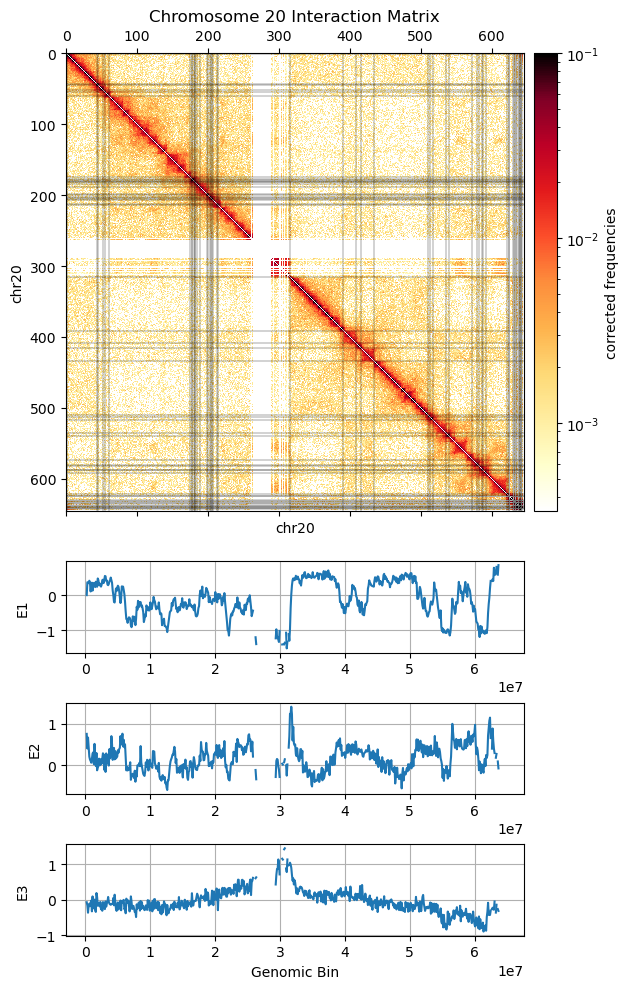

In [16]:
# Perform eigendecomposition to get the first 3 eigenvectors
cis_eigs = cooltools.eigs_cis(clr, gc_cov, view_df=view_df, n_eigs=3)
eigenvector_tracks = cis_eigs[1][['chrom', 'start', 'end', 'E1', 'E2', 'E3']]

# Set up the figure layout
f, ax = plt.subplots(figsize=(15, 10))

# Plot the interaction matrix for chromosome 20
norm = LogNorm(vmax=0.1)
chr20_matrix = clr.matrix(balance=True).fetch('chr20')
im = ax.matshow(chr20_matrix, norm=norm, cmap='fall')
ax.set_title('Chromosome 20 Interaction Matrix')
ax.set_ylabel('chr20')
ax.set_xlabel('chr20')
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

# Create divider for eigenvectors
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')

for i in np.where(np.diff((eigenvector_tracks['E1'] > 0).astype(int)))[0]:
    ax.axhline(y=i, color='k', linestyle='-', lw=0.25)  # Horizontal line
    ax.axvline(x=i, color='k', linestyle='-', lw=0.25)  # Vertical line

# Additional code to plot eigenvector tracks E1, E2, and E3
# Create axes for the eigenvector plots below the interaction matrix
eigen_axes = [divider.append_axes("bottom", size="20%", pad=0.5) for _ in range(3)]

# Plot each eigenvector in its respective axis
for i, eig in enumerate(['E1', 'E2', 'E3']):
    eigen_axes[i].plot(eigenvector_tracks['start'] + (eigenvector_tracks['end'] - eigenvector_tracks['start']) / 2, eigenvector_tracks[eig])
    eigen_axes[i].set_ylabel(f'{eig}')
    eigen_axes[i].grid(True)


# Only the last eigenvector axis should have the x-axis label
eigen_axes[-1].set_xlabel('Genomic Bin')

plt.tight_layout()
plt.show()

/gpfs/commons/home/wlounsberyscaife/anaconda3/envs/cool_env/lib/python3.10/site-packages/cooltools/lib/checks.py:550: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in track.groupby([track.columns[0]]):


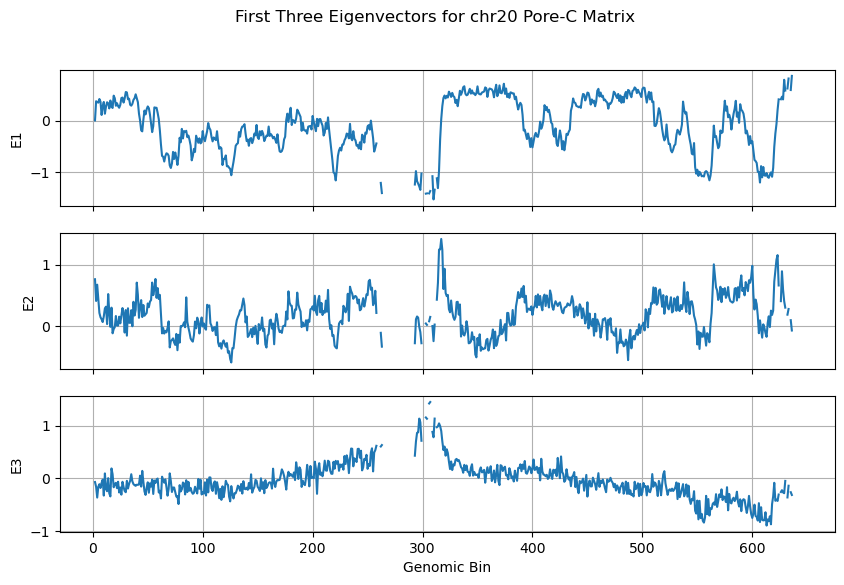

In [17]:
# Create a view for chromosome 20
view_df = pd.DataFrame({'chrom': ['chr20'],
                        'start': [0],
                        'end': [clr.chromsizes['chr20']],
                        'name': ['chr20']})

# Perform eigendecomposition to get the first 3 eigenvectors
cis_eigs = cooltools.eigs_cis(clr, gc_cov, view_df=view_df, n_eigs=3)
eigenvector_tracks = cis_eigs[1][['chrom', 'start', 'end', 'E1', 'E2', 'E3']]


def plot_interaction_matrix_and_eigenvectors(clr, eigenvector_tracks, chromosome):
    # Set up the figure and axes
    f, ax = plt.subplots(figsize=(15, 10))

    # Get the matrix data
    matrix = clr.matrix(balance=True).fetch(chromosome)

    # Plot the interaction matrix
    norm = LogNorm(vmax=0.1)
    im = ax

# Plotting the first three eigenvectors
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

for i, eig in enumerate(['E1', 'E2', 'E3']):
    ax[i].plot(eigenvector_tracks[eig], label=f'{eig}')
    ax[i].set_ylabel(f'{eig}')
    #ax[i].legend(loc='upper right')
    ax[i].grid(True)

ax[-1].set_xlabel('Genomic Bin')
plt.suptitle('First Three Eigenvectors for chr20 Pore-C Matrix')
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()